## Ecommerce Advertising Project

### Step 1: Gather Data

In [3]:
import pandas as pd                    # For data manipulation and analysis  
import numpy as np                     # For numerical computations  
import matplotlib.pyplot as plt        # For data visualization  
import seaborn as sns                  # For advanced statistical visualizations 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')      #Ensures plots are displayed directly in the Jupyter Notebook.

In [4]:
df = pd.read_csv(r"D:\ML Project\Ecommerce Advertising.csv")

In [5]:
df.head()  # First 5 rows

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,False,Tunisia,3/27/2016 0:53,False
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,True,Nauru,4/4/2016 1:39,False
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,False,San Marino,3/13/2016 20:35,False
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,True,Italy,1/10/2016 2:31,False
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,False,Iceland,6/3/2016 3:36,False


In [6]:
df.tail() #Last 5 rows

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,True,Lebanon,2/11/2016 21:49,True
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,True,Bosnia and Herzegovina,4/22/2016 2:07,True
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,True,Mongolia,2/1/2016 17:24,True
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,False,Guatemala,3/24/2016 2:35,False
999,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,False,Brazil,6/3/2016 21:43,True


In [7]:
df.shape       # Dimensions (rows, columns)

(1000, 10)

In [8]:
df.columns     # Column names

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [9]:
# Standardizing column names: replacing spaces/special characters with underscores & converting to lowercase

df.columns = df.columns.str.replace(' ', '_').str.lower()
df.head(1)

,daily_time_spent_on_site,age,area_income,daily_internet_usage,ad_topic_line,city,male,country,timestamp,clicked_on_ad
0,68.95,35,61833.9,256.09,Cloned 5thgeneration orchestration,Wrightburgh,False,Tunisia,3/27/2016 0:53,False


In [10]:
df.info() # Data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   daily_time_spent_on_site  1000 non-null   float64
 1   age                       1000 non-null   int64  
 2   area_income               1000 non-null   float64
 3   daily_internet_usage      1000 non-null   float64
 4   ad_topic_line             1000 non-null   object 
 5   city                      1000 non-null   object 
 6   male                      1000 non-null   bool   
 7   country                   1000 non-null   object 
 8   timestamp                 1000 non-null   object 
 9   clicked_on_ad             1000 non-null   bool   
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 64.6+ KB


#### The dataset has 1000 entries and 10 columns with no missing values. Data types include numerical (float64, int64), categorical (object), and boolean (bool).

In [12]:
print("Duplicate rows:", df.duplicated().sum())          # Checks for and prints the number of duplicate rows in the dataset

Duplicate rows: 0


### Step 2: Exploratory Data Analysis (EDA)

In [14]:
df.describe()  # Summary stats

,daily_time_spent_on_site,age,area_income,daily_internet_usage
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,65.000200,36.009000,55000.000080,180.000100
std,15.853615,8.785562,13414.634022,43.902339
min,32.600000,19.000000,13996.500000,104.780000
25%,51.360000,29.000000,47031.802500,138.830000
50%,68.215000,35.000000,57012.300000,183.130000
75%,78.547500,42.000000,65470.635000,218.792500
max,91.430000,61.000000,79484.800000,269.960000


In [15]:
df.nunique()   # Unique values per column

daily_time_spent_on_site     900
age                           43
area_income                 1000
daily_internet_usage         966
ad_topic_line               1000
city                         969
male                           2
country                      237
timestamp                    997
clicked_on_ad                  2
dtype: int64

In [16]:
df.isnull().sum() # Count of null values

daily_time_spent_on_site    0
age                         0
area_income                 0
daily_internet_usage        0
ad_topic_line               0
city                        0
male                        0
country                     0
timestamp                   0
clicked_on_ad               0
dtype: int64

In [17]:
# This output shows that there are no missing values in any of the columns of dataset (all are 0). 
# This indicates that the data is complete and doesn't require any handling for missing data, 
# which is a good sign for model building.

In [18]:
# ad_topic_line - Since every value is unique, this column does not contribute useful patterns. 
# city - Too many unique values,  High cardinality, not useful for numeric analysis, we have country column already..

df.drop('ad_topic_line', axis=1, inplace=True) 
df.drop('city', axis=1, inplace=True) 

In [19]:
df['timestamp'] = pd.to_datetime(df['timestamp'])  # Convert to datetime format
df['hour'] = df['timestamp'].dt.hour               # Extract hour of the day
df['day'] = df['timestamp'].dt.day                 # Extract day of the month
df['month'] = df['timestamp'].dt.month             # Extract month of the year
df.drop('timestamp', axis=1, inplace=True)         # Drop original timestamp

In [20]:
df.head()

,daily_time_spent_on_site,age,area_income,daily_internet_usage,male,country,clicked_on_ad,hour,day,month
0,68.95,35,61833.90,256.09,False,Tunisia,False,0,27,3
1,80.23,31,68441.85,193.77,True,Nauru,False,1,4,4
2,69.47,26,59785.94,236.50,False,San Marino,False,20,13,3
3,74.15,29,54806.18,245.89,True,Italy,False,2,10,1
4,68.37,35,73889.99,225.58,False,Iceland,False,3,3,6


#### Visualizing Outliers with Boxplots

In [22]:
df.head(1)

,daily_time_spent_on_site,age,area_income,daily_internet_usage,male,country,clicked_on_ad,hour,day,month
0,68.95,35,61833.9,256.09,False,Tunisia,False,0,27,3


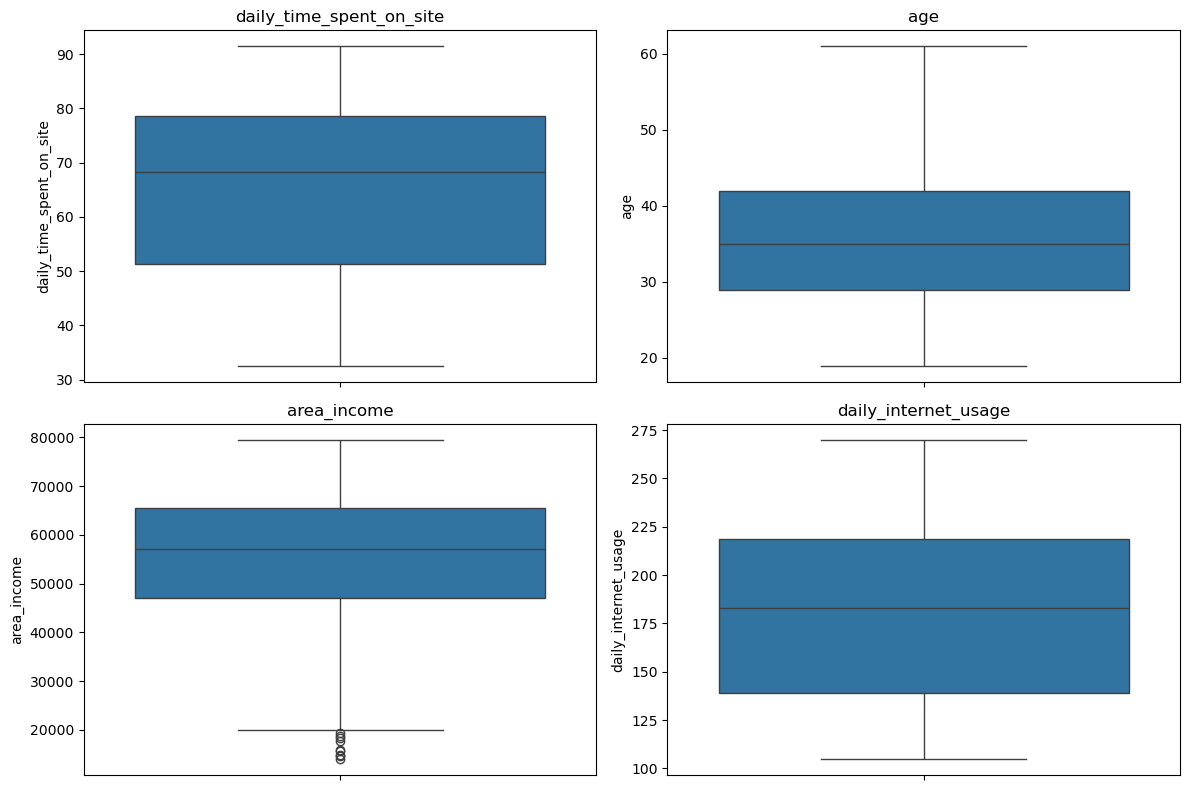

In [23]:
# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Boxplot for 'Daily Time Spent on Site'
sns.boxplot(ax=axes[0, 0], y=df['daily_time_spent_on_site'])
axes[0, 0].set_title('daily_time_spent_on_site')

# Boxplot for 'Age'
sns.boxplot(ax=axes[0, 1], y=df['age'])
axes[0, 1].set_title('age')

# Boxplot for 'Area Income'
sns.boxplot(ax=axes[1, 0], y=df['area_income'])
axes[1, 0].set_title('area_income')

# Boxplot for 'Daily Internet Usage'
sns.boxplot(ax=axes[1, 1], y=df['daily_internet_usage'])
axes[1, 1].set_title('daily_internet_usage')

# Adjust the layout
plt.tight_layout()  # Prevents overlap
plt.show()


In [24]:
# Function to remove outliers using IQR
def remove_outliers(df, feature_name):
    # Calculate Q1 and Q3 (25th and 75th percentiles)
    Q1 = df[feature_name].quantile(0.25)
    Q3 = df[feature_name].quantile(0.75)
    
    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Calculate the lower and upper bounds for outlier removal
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the DataFrame to remove outliers
    df = df[(df[feature_name] >= lower_bound) & (df[feature_name] <= upper_bound)]
    
    return df

# Apply the function to remove outliers from specific features
df = remove_outliers(df, 'daily_time_spent_on_site')  # Replace with any feature you want to process
df = remove_outliers(df, 'age')  # Apply to another feature
df = remove_outliers(df, 'area_income')  # Apply to another feature
df = remove_outliers(df, 'daily_internet_usage')  # Apply to another feature


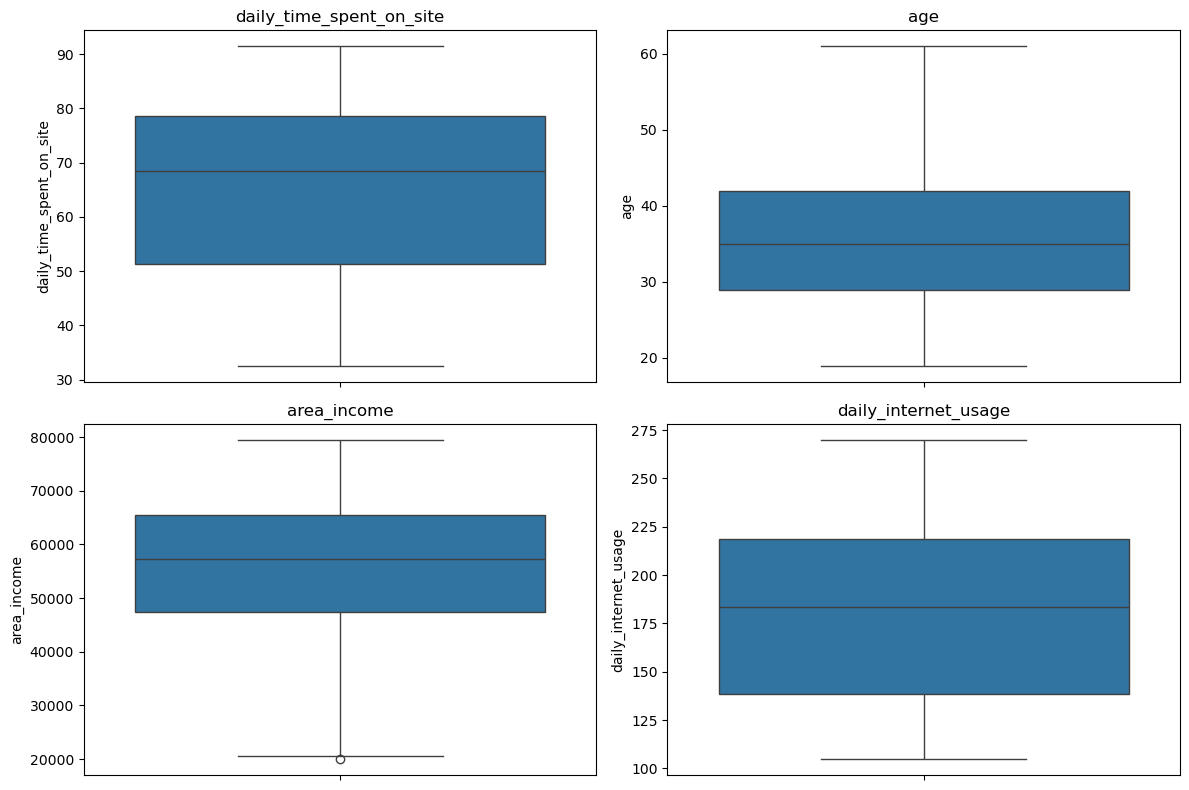

In [25]:
# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Boxplot for 'Daily Time Spent on Site'
sns.boxplot(ax=axes[0, 0], y=df['daily_time_spent_on_site'])
axes[0, 0].set_title('daily_time_spent_on_site')

# Boxplot for 'Age'
sns.boxplot(ax=axes[0, 1], y=df['age'])
axes[0, 1].set_title('age')

# Boxplot for 'Area Income'
sns.boxplot(ax=axes[1, 0], y=df['area_income'])
axes[1, 0].set_title('area_income')

# Boxplot for 'Daily Internet Usage'
sns.boxplot(ax=axes[1, 1], y=df['daily_internet_usage'])
axes[1, 1].set_title('daily_internet_usage')

# Adjust the layout
plt.tight_layout()  # Prevents overlap
plt.show()

#### Univariate, Bivariate, and Multivariate Analysis

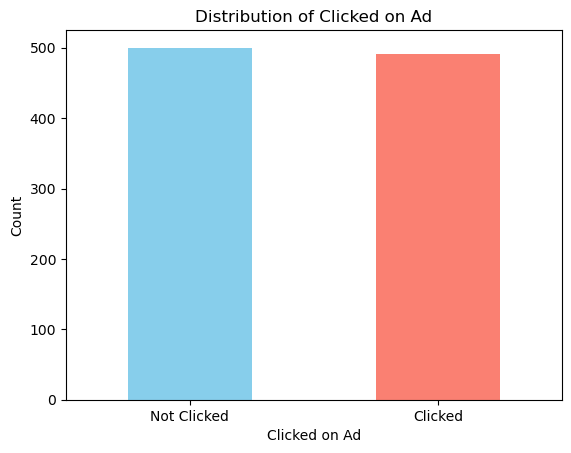

In [27]:
# Univariate analysis for target variable 'clicked_on_ad'
df['clicked_on_ad'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Clicked on Ad')
plt.xlabel('Clicked on Ad')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Clicked', 'Clicked'], rotation=0)
plt.show()

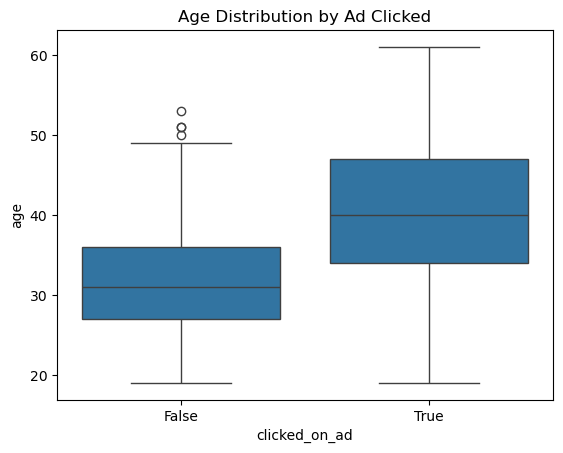

In [28]:
sns.boxplot(x='clicked_on_ad', y='age', data=df)
plt.title('Age Distribution by Ad Clicked')
plt.show()

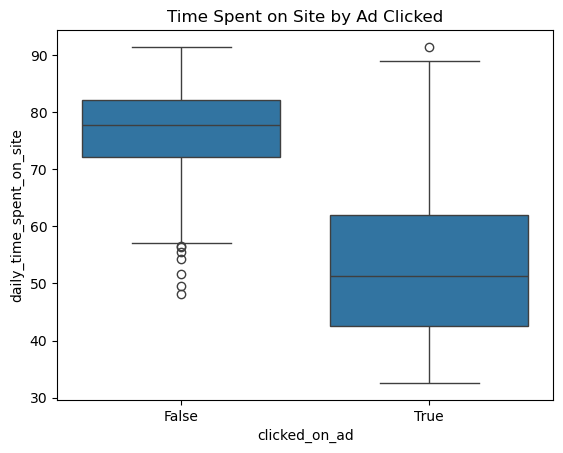

In [29]:
sns.boxplot(x='clicked_on_ad', y='daily_time_spent_on_site', data=df)
plt.title('Time Spent on Site by Ad Clicked')
plt.show()

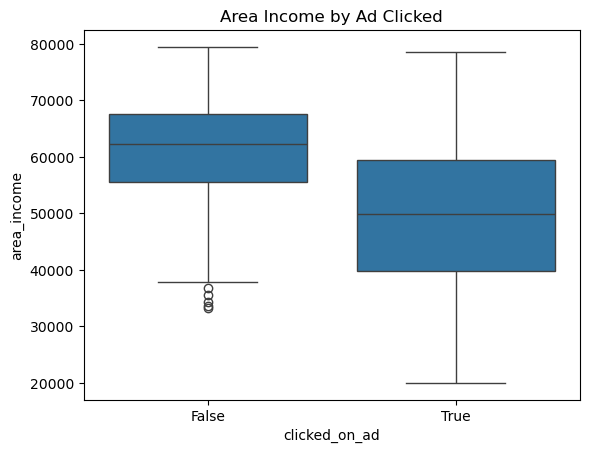

In [30]:
sns.boxplot(x='clicked_on_ad', y='area_income', data=df)
plt.title('Area Income by Ad Clicked')
plt.show()

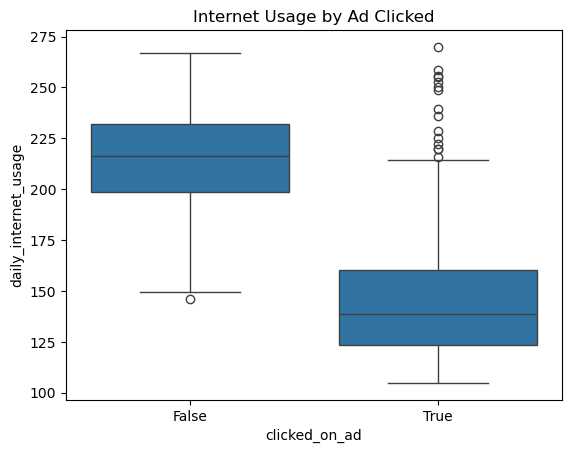

In [31]:
sns.boxplot(x='clicked_on_ad', y='daily_internet_usage', data=df)
plt.title('Internet Usage by Ad Clicked')
plt.show()


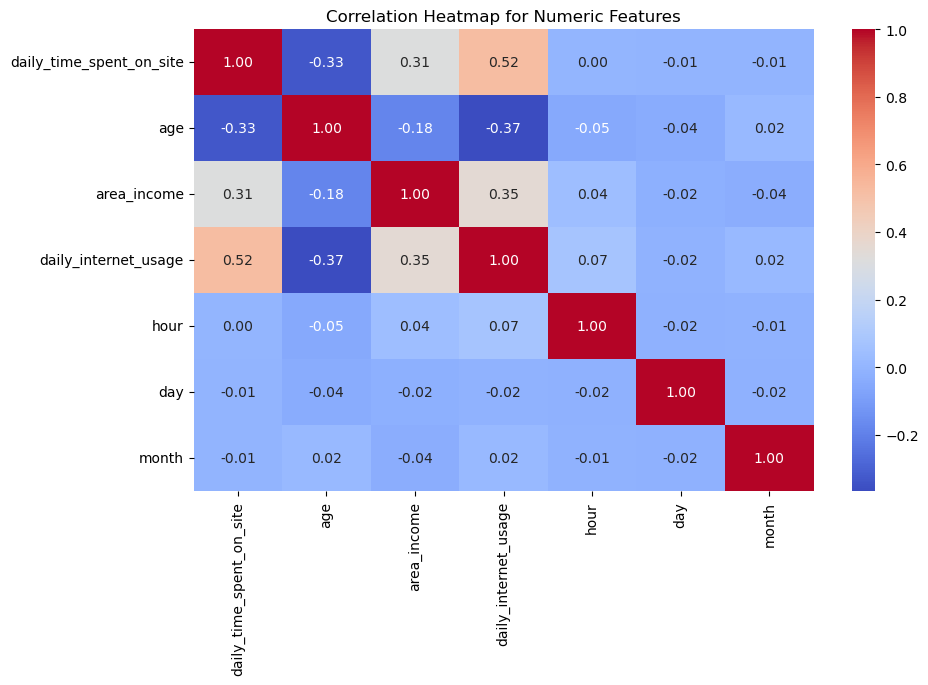

In [32]:
# Select only the numeric columns
numeric_df = df[['daily_time_spent_on_site', 'age', 'area_income', 'daily_internet_usage','hour','day','month']]

# Calculate the correlation matrix
correlation = numeric_df.corr()

# Display the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numeric Features')
plt.show()

In [33]:
# Correlation with clicked_on_ad is very low/weak of columns hour, day, month
df.drop('hour', axis=1, inplace=True) 
df.drop('day', axis=1, inplace=True) 
df.drop('month', axis=1, inplace=True) 

df.head(1)

,daily_time_spent_on_site,age,area_income,daily_internet_usage,male,country,clicked_on_ad
0,68.95,35,61833.9,256.09,False,Tunisia,False


### Step 3: Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler         # for Logistic Regression, SVM, PCA

# Select only the numeric columns
# numeric_df = df[['daily_time_spent_on_site', 'age', 'area_income', 'daily_internet_usage']]

stdscaler = StandardScaler()
numeric_df = stdscaler.fit_transform(numeric_df)

In [36]:
df.head(5)

,daily_time_spent_on_site,age,area_income,daily_internet_usage,male,country,clicked_on_ad
0,68.95,35,61833.90,256.09,False,Tunisia,False
1,80.23,31,68441.85,193.77,True,Nauru,False
2,69.47,26,59785.94,236.50,False,San Marino,False
3,74.15,29,54806.18,245.89,True,Italy,False
4,68.37,35,73889.99,225.58,False,Iceland,False


### Step 4: Encoding Categorical Features

In [38]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
le = LabelEncoder()

In [39]:
df['male'] = le.fit_transform(df['male'])
df['clicked_on_ad'] = le.fit_transform(df['clicked_on_ad'])

In [40]:
#Since the "Country" column is categorical and consists of names of different countries
#need to convert it into a numerical format ..

df['country'] = le.fit_transform(df['country'])

In [41]:
df.head()

,daily_time_spent_on_site,age,area_income,daily_internet_usage,male,country,clicked_on_ad
0,68.95,35,61833.90,256.09,0,215,0
1,80.23,31,68441.85,193.77,1,147,0
2,69.47,26,59785.94,236.50,0,184,0
3,74.15,29,54806.18,245.89,1,103,0
4,68.37,35,73889.99,225.58,0,96,0


### Step 5: Train-Test Split


In [80]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop('clicked_on_ad', axis=1)
y = df['clicked_on_ad']

In [86]:
X.head()

,daily_time_spent_on_site,age,area_income,daily_internet_usage,male,country
0,68.95,35,61833.90,256.09,0,215
1,80.23,31,68441.85,193.77,1,147
2,69.47,26,59785.94,236.50,0,184
3,74.15,29,54806.18,245.89,1,103
4,68.37,35,73889.99,225.58,0,96


In [90]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: clicked_on_ad, dtype: int64

In [92]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 6: Model Training & Hyperparameter Tuning

#### Model - 1. Logistic Regression (LR)

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [161]:
# Predictions and Evaluation
y_pred_lr = model_lr.predict(X_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr)}\n")

print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9246231155778895

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       103
           1       0.95      0.90      0.92        96

    accuracy                           0.92       199
   macro avg       0.93      0.92      0.92       199
weighted avg       0.93      0.92      0.92       199



#### Model - 2. Decision Trees (DT)

In [163]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Model
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [165]:
# Predictions and Evaluation
y_pred_dt = model_dt.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt)}\n")

print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9447236180904522

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95       103
           1       0.93      0.96      0.94        96

    accuracy                           0.94       199
   macro avg       0.94      0.95      0.94       199
weighted avg       0.95      0.94      0.94       199



#### Model - 3. Random Forest

In [167]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_rf = model_rf.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}\n")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9748743718592965

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       103
           1       0.98      0.97      0.97        96

    accuracy                           0.97       199
   macro avg       0.98      0.97      0.97       199
weighted avg       0.97      0.97      0.97       199



#### Model - 4. Support Vector Machine (SVM)

In [169]:
from sklearn.svm import SVC

# Support Vector Machine (SVM) Model
model_svm = SVC(kernel='linear')  #  kernels = 'linear'
model_svm.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_svm = model_svm.predict(X_test)
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm)}\n")
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.964824120603015

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       103
           1       0.96      0.97      0.96        96

    accuracy                           0.96       199
   macro avg       0.96      0.96      0.96       199
weighted avg       0.96      0.96      0.96       199



In [157]:
from sklearn.svm import SVC

# Support Vector Machine (SVM) Model
model_svm = SVC(kernel='rbf')  #  kernels = 'rbf'
model_svm.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_svm = model_svm.predict(X_test)
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm)}\n")
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.6633165829145728

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.83      0.72       103
           1       0.72      0.49      0.58        96

    accuracy                           0.66       199
   macro avg       0.68      0.66      0.65       199
weighted avg       0.68      0.66      0.65       199



In [170]:
from sklearn.svm import SVC

# Support Vector Machine (SVM) Model
model_svm = SVC(kernel='poly')  #  kernels = 'polynomial'
model_svm.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_svm = model_svm.predict(X_test)
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm)}\n")
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.6633165829145728

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.73      0.69       103
           1       0.67      0.59      0.63        96

    accuracy                           0.66       199
   macro avg       0.66      0.66      0.66       199
weighted avg       0.66      0.66      0.66       199



#### Model - 5. K-Nearest Neighbors (KNN)

In [188]:
from sklearn.neighbors import KNeighborsClassifier

# KNN Model
model_knn = KNeighborsClassifier(n_neighbors=15)  
model_knn.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_knn = model_knn.predict(X_test)
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn)}\n")
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.6381909547738693

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.77      0.69       103
           1       0.67      0.50      0.57        96

    accuracy                           0.64       199
   macro avg       0.64      0.63      0.63       199
weighted avg       0.64      0.64      0.63       199

